In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, confusion_matrix, roc_auc_score, roc_curve

import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

sns.set()

In [41]:
from loader import *
from neural_network import *
from plot import *
from train import *
from loss import *

# LOAD FILES AND PREPARE TRAIN AND TEST SET

In [42]:
insee_dataset = pd.read_csv('../data/data_INSEE_clean.csv', sep=';', dtype = {'code': str})
secound_round_result = pd.read_csv("../data/clean_s_round_elect_results.csv", sep = ",") 
secound_round_result = secound_round_result.drop(columns=["Inscrits", "% Abs/Ins"])


In [43]:

dataset = insee_dataset.merge(secound_round_result, how='inner', left_on='code', right_on='Code Insee') \
                             .drop(columns=["Code Insee"])


In [44]:
# DIFFERENT SETS OF FEATURES 
sparse_features = ['density_pop', 'Indice_vieillissement', 'ratio_etude_sup','mean_familiy_size',\
                   'ratio_etude_sup', 'hlm', 'res_second', 'ta_homme', 'part_agri_y', 'part_cadre']

all_features = list(set(insee_dataset.columns) - set(["code", "commune", "pop", "type_agglo"]))

In [45]:
# CHOOSE THE FEATURES YOU WANT TO KEEP
features_to_keep = all_features
nb_features = len(features_to_keep)

print("number of features", nb_features)

# CHOOSE DIFFERENT VARIABLES
batch_size = 36
min_habs = 500
test_size = 0.5

number of features 67


In [46]:
x_train, x_test, y_train, y_test, train_loader, town_train_index, town_test_index = \
    load_data(dataset, features_to_keep, batch_size, min_habs, test_size, turn=2)

# SIMPLE LOGISTIC REGRESSION ON THE DISTRIBUTION RESULTS


In [47]:
log_reg = Log_reg_one_neuron(nb_features)
optims = torch.optim.Adam(log_reg.parameters())
loss = cross_entropy_loss

In [48]:
train_neurals_networks(n_epochs=50, train_loader=train_loader, \
                       list_of_loss_function=[loss], \
                       list_of_models=[log_reg],\
                       list_of_optim=[optims],\
                       print_epochs=10)

epoch n° 0
  model n° 0 - loss : 0.6948590992202222
----
epoch n° 10
  model n° 0 - loss : 0.6641351619796574
----
epoch n° 20
  model n° 0 - loss : 0.6641840638129364
----
epoch n° 30
  model n° 0 - loss : 0.6646181837493825
----
epoch n° 40
  model n° 0 - loss : 0.6633478044903894
----


In [103]:
accurracy(y_pred_train["LE PEN"], y_train)

0.8311366305624429

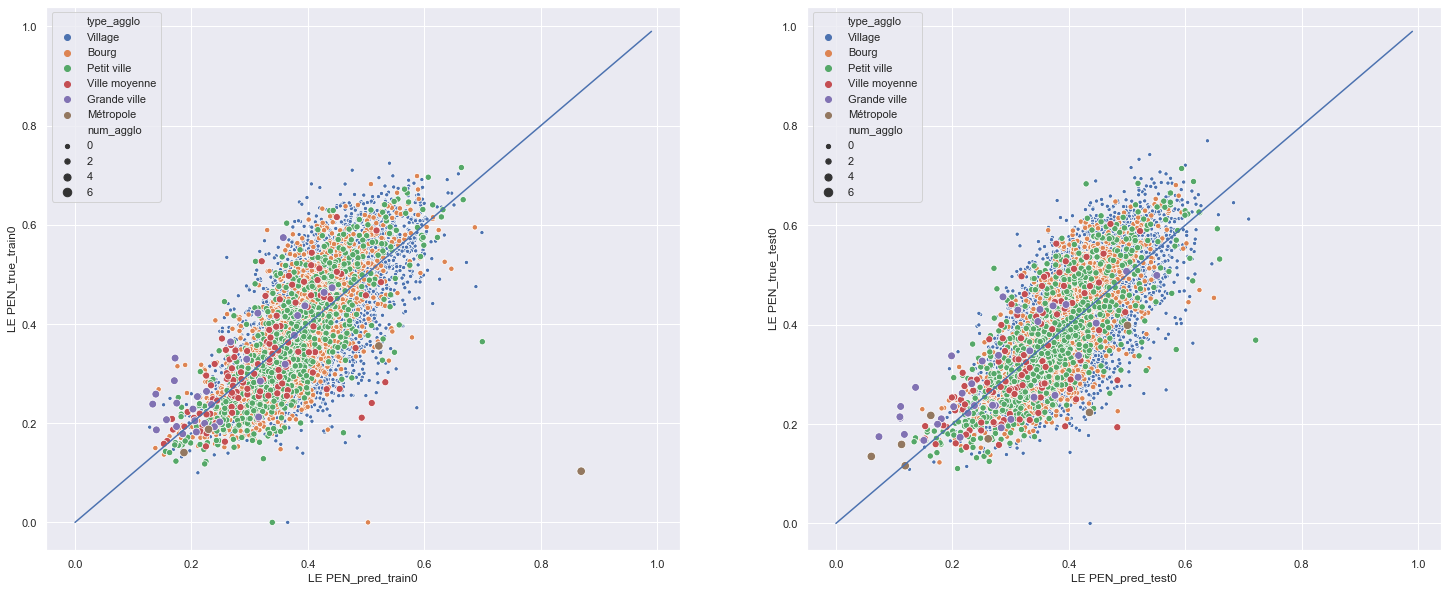

In [51]:
regression_plot(y_train, y_test, pred_list, "LE PEN", town_train_index, town_test_index, turn=2)

# NEURAL NETWORKS ON THE DISTRIBUTION RESULTS
Can we improve result by adding one layer ?

In [16]:
models = [Log_reg_one_neuron(nb_features), NN_2Layers_1Neuron(nb_features, 50)]
optims = [torch.optim.Adam(models[0].parameters()), torch.optim.Adam(models[1].parameters())]
loss = [cross_entropy_loss, cross_entropy_loss]

In [17]:
train_neurals_networks(n_epochs=10, train_loader=train_loader, \
                       list_of_loss_function=loss, \
                       list_of_models=models,\
                       list_of_optim=optims,\
                       print_epochs=1)

epoch n° 0
  model n° 0 - loss : 0.6764586036194098
  model n° 1 - loss : 0.6666540937244613
----
epoch n° 1
  model n° 0 - loss : 0.6663001879280162
  model n° 1 - loss : 0.6634143968703041
----
epoch n° 2
  model n° 0 - loss : 0.6643243515995186
  model n° 1 - loss : 0.6621751743303218
----
epoch n° 3
  model n° 0 - loss : 0.6639152910787735
  model n° 1 - loss : 0.6620826550492658
----
epoch n° 4
  model n° 0 - loss : 0.6641020139618099
  model n° 1 - loss : 0.6614795318791564
----
epoch n° 5
  model n° 0 - loss : 0.6637136762690656
  model n° 1 - loss : 0.661108416570744
----
epoch n° 6
  model n° 0 - loss : 0.6637316945013306
  model n° 1 - loss : 0.6618116688280599
----
epoch n° 7
  model n° 0 - loss : 0.6638297494588323
  model n° 1 - loss : 0.6623192969622187
----
epoch n° 8
  model n° 0 - loss : 0.6636785604584385
  model n° 1 - loss : 0.6608259051058774
----
epoch n° 9
  model n° 0 - loss : 0.6636457317311999
  model n° 1 - loss : 0.6609453788385705
----


In [18]:
pred_list = pred_model(x_train, x_test, models, turn=2)

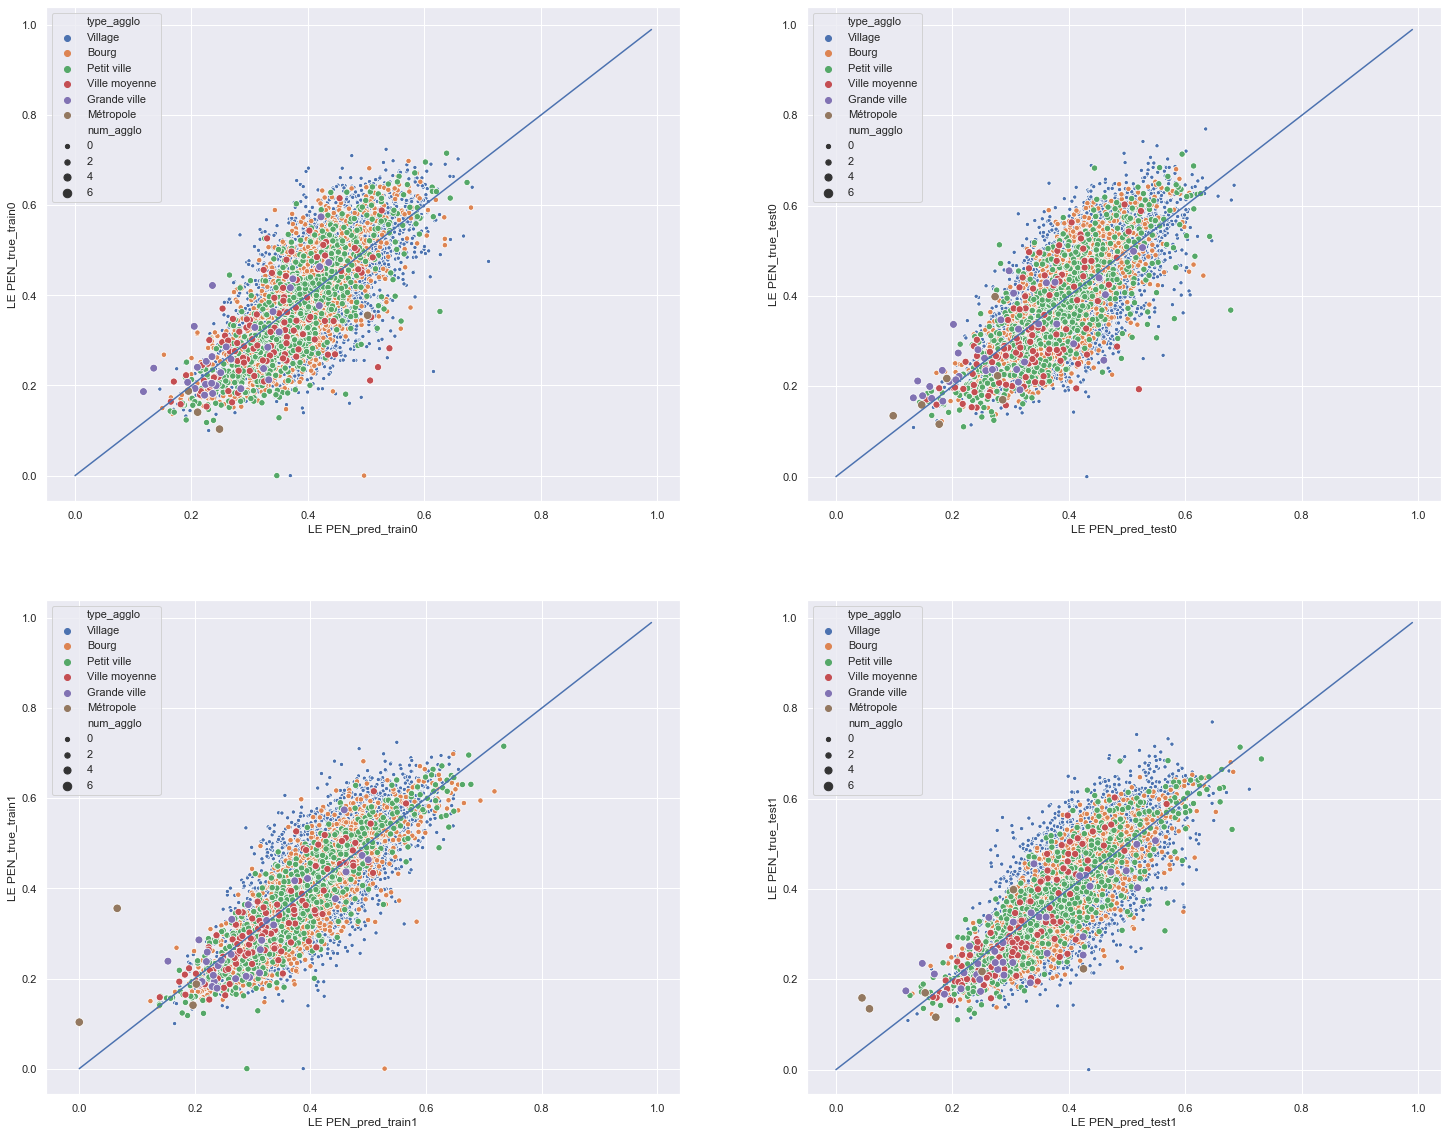

In [19]:
regression_plot(y_train, y_test, pred_list, "LE PEN", town_train_index, town_test_index, turn=2)

# LOAD FILES AND PREPARE TRAIN AND TEST SET

In [3]:
# FOR NOW WE DROP EQUIPEMENT FEATURES
equi_col = ['hypermarché', 'pôle emploi','banques', 'poste', 'epicerie', \
                'boulangerie', 'boucherie', 'maternelle', 'élémentaire', 'collège', 'urgences', \
                'lycee', 'dentiste', 'medecin','infirmier', 'creche', 'kine', 'pharmacie', 'epahd']

insee_dataset = pd.read_csv('../data/data_INSEE_clean.csv', sep=';', dtype = {'code': str}) \
                  .drop(columns=["commune"]+equi_col)

In [4]:
secound_round_result = pd.read_csv("../data/clean_s_round_elect_results.csv", sep = ",") 
secound_round_result = secound_round_result.drop(columns=["Libellé de la commune", "Inscrits", "% Abs/Ins"])
secound_round_result["WINNER"] = np.where(secound_round_result['LE PEN'] > \
                                          secound_round_result['MACRON'], 1, 0)
secound_round_result[["MACRON", "LE PEN"]] = secound_round_result[["MACRON", "LE PEN"]] / 100

In [5]:
final_dataset = insee_dataset.merge(secound_round_result, how='inner', left_on='code', right_on='Code Insee') \
                             .drop(columns=["Code Insee"])
print(final_dataset.shape)

(32729, 54)


In [6]:
X = final_dataset.drop(columns=["code", "LE PEN", "MACRON", "type_agglo", "WINNER"]) 
#MAYBE KEEP TYPE AGGLO LATER

Y = final_dataset[["WINNER", "LE PEN"]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16364, 49)
(16364, 2)
(16365, 49)
(16365, 2)


In [7]:
scaler = StandardScaler()
clf_lr = LogisticRegression(solver='liblinear')

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [22]:
y_train

array([[0.2633],
       [0.2025],
       [0.2955],
       ...,
       [0.33  ],
       [0.2827],
       [0.1794]])

# SIMPLE LOGISTIC REGRESSION CLASSIFIER
Here we just take into account the winner to train a simple reg_log classifier.

In [37]:
y_train_winner = np.where(y_train > 0.5, 1, 0)
y_test_winner = np.where(y_test > 0.5, 1, 0)

In [30]:
clf_lr = LogisticRegression(solver='liblinear')

param_grid_lr = {"C" : [0.001,0.01,0.05,0.1,1.0]}
gridsearch_lr = GridSearchCV(clf_lr,param_grid=param_grid_lr, 
                             cv=10, 
                             scoring='accuracy', 
                             return_train_score=True,
                             refit=True)


gridsearch_lr.fit(x_train, y_train_winner.ravel())
#pd.DataFrame(gridsearch_lr.cv_results_).T

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [31]:
clf_lr = LogisticRegression(solver='liblinear', C=0.1)
clf_lr.fit(x_train, y_train_winner.ravel())

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### STUDY WHICH FEATURES ARE IMPORTANT FOR THE CLASSIFIER 

In [33]:
features_importancy = pd.DataFrame(features_to_keep, columns=['features'])
features_importancy['importancy'] = clf_lr.coef_.T

# We sort by importancy 
features_importancy['abs_importancy'] = features_importancy['importancy'].apply(abs)
features_importancy = features_importancy.sort_values('abs_importancy', ascending=False)

# We keep only the 5 most important features 
features_importancy = features_importancy.iloc[:5,:]
features_importancy = features_importancy.sort_values('importancy', ascending=True)


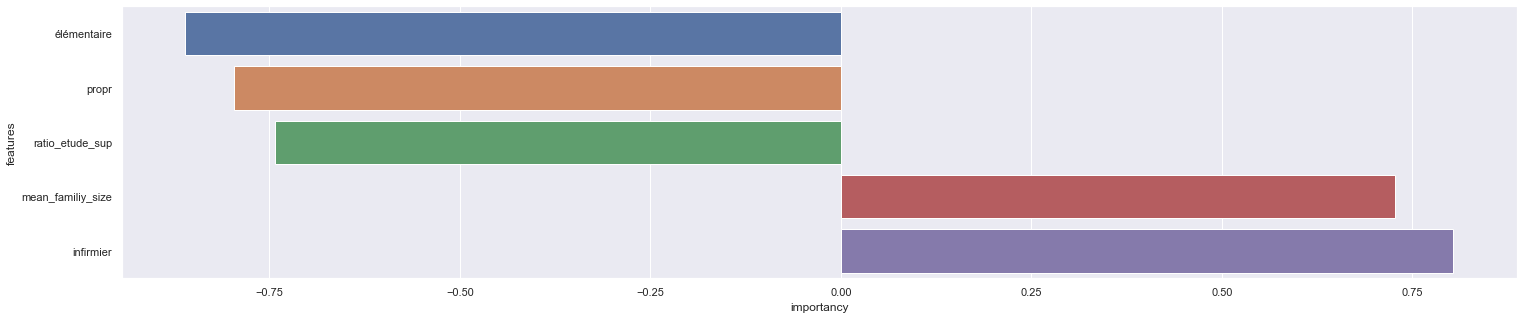

In [34]:
f, axes = plt.subplots(1, 1, figsize=(25, 5))
sns.barplot(x="importancy", y="features", data=features_importancy)


In [35]:
y_result = gridsearch_lr.predict_proba(x_test)[:,1]
y_train_result = gridsearch_lr.predict_proba(x_train)[:,1]

In [38]:
fpr, tpr, _ = roc_curve(y_test_winner, y_result)
roc_auc = roc_auc_score(y_test_winner, y_result)

#On train set
fpr_t, tpr_t, _ = roc_curve(y_train_winner, y_train_result)
roc_auc_t = roc_auc_score(y_train_winner, y_train_result)

### HOW GOOD IS THIS SIMPLE CLASSIFIER ? 

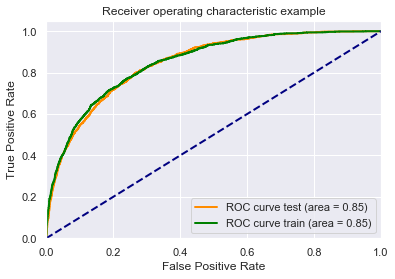

In [39]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve test (area = %0.2f)' % roc_auc)
plt.plot(fpr_t, tpr_t, color='green',
         lw=lw, label='ROC curve train (area = %0.2f)' % roc_auc_t)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [82]:
confusion_1Layer = confusion_matrix(winner_true, winner_pred_1Layer)
confusion_2Layers = confusion_matrix(winner_true, winner_pred_2Layers)
print(confusion_1Layer)
print(confusion_2Layers)

def acurracy(c):
    return (c[0,0] + c[1,1]) / np.sum(np.sum(c))

print("Acurracy 1 Layer :", acurracy(confusion_1Layer))
print("Acurracy 2 Layers :", acurracy(confusion_2Layers))

[[ 1685  2730]
 [  910 11040]]
[[ 2043  2372]
 [ 1005 10945]]
Acurracy 1 Layer : 0.7775740910479683
Acurracy 2 Layers : 0.7936449740299419


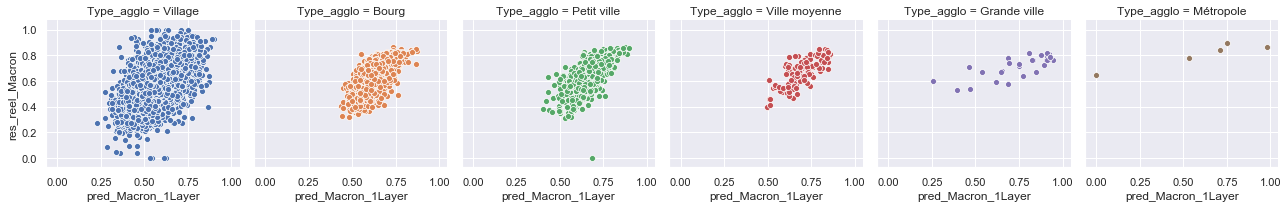

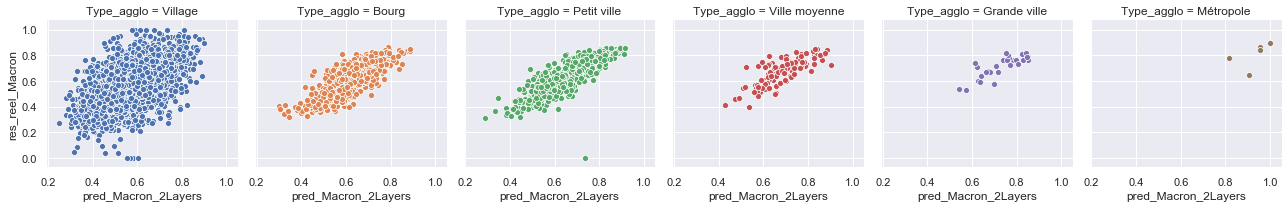

In [87]:
g1 = sns.FacetGrid(df, col="Type_agglo", hue ="Type_agglo")
g1.map(sns.scatterplot, "pred_Macron_1Layer", "res_reel_Macron")

g2 = sns.FacetGrid(df, col="Type_agglo", hue ="Type_agglo")
g2.map(sns.scatterplot, "pred_Macron_2Layers", "res_reel_Macron")

In [88]:
print("score R2 for 1 Layer", r2_score(df["res_reel_Macron"], df["pred_Macron_1Layer"]))
print("score R2 for 2 Layers", r2_score(df["res_reel_Macron"], df["pred_Macron_2Layers"]))

score R2 for 1 Layer 0.3400847864704811
score R2 for 2 Layers 0.4110349541393554


# TRY SOME DIFFERENT ALGO ON THE SAME DATESET
Objectif : improve R2 score 

### RANDOM FOREST REGRESSION

In [94]:
regr = RandomForestRegressor(max_depth=9, random_state=0,n_estimators=1000)

In [95]:
regr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [97]:
y_pred = regr.predict(x_test)

In [96]:
regr.score(x_test, y_test)

/Users/dldk/anaconda3/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.3989990802022152